In [8]:
%autosave 15


Autosaving every 15 seconds


In [70]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from pydataset import data


In [16]:
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
tips.shape

(244, 7)

In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [21]:
#Create a column named price_per_person
tips['price_per_person'] = tips['total_bill']/tips['size']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [22]:
#using total_bill, size, and day could be important feature to prediction tip amount
#Use KBest to select top 2 features
def select_kbest(X, y, k):
    selector = SelectKBest(k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()]
    return selected_features

In [29]:
tips_encoded = pd.get_dummies(tips, columns=['day'], drop_first=True)
tips_encoded

,total_bill,tip,sex,smoker,time,size,price_per_person,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,8.495000,0,0,1
1,10.34,1.66,Male,No,Dinner,3,3.446667,0,0,1
2,21.01,3.50,Male,No,Dinner,3,7.003333,0,0,1
3,23.68,3.31,Male,No,Dinner,2,11.840000,0,0,1
4,24.59,3.61,Female,No,Dinner,4,6.147500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,9.676667,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,13.590000,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,11.335000,0,1,0
242,17.82,1.75,Male,No,Dinner,2,8.910000,0,1,0


In [40]:
# Separate predictors (X) and target (y)
X = tips_encoded[['total_bill', 'size', 'day_Sat', 'day_Sun', 'day_Fri']]
y = tips_encoded['tip']


In [36]:
# Use Select K Best to select the top 2 features for predicting tip amount
def select_kbest(X, y, k):
    selector = SelectKBest(k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()]
    return selected_features

In [48]:
#select the top 2 
X = tips_encoded[['total_bill', 'size', 'day_Fri', 'day_Sat', 'day_Sun']]
y = tips_encoded['tip']
selected_features_kbest = select_kbest(X, y, k=3)
print("Select K Best Features:", selected_features_kbest)
#Besides total_bill and size, Sunday tend the be the top

Select K Best Features: Index(['total_bill', 'size', 'day_Sun'], dtype='object')


In [47]:
# Use Recursive Feature Elimination (RFE) to select the top 2 features for tip amount
def rfe(X, y, n):
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=n, step=1)
    selector = selector.fit(X, y)
    selected_features = X.columns[selector.support_]
    return selected_features
rfe(X, y, n=3)
#findings: besides total_bill and size, Friday tend to be the top pick


Index(['total_bill', 'size', 'day_Fri'], dtype='object')

Why Select K Best and Recursive Feature Elimination might give different 

answers:
Select K Best uses statistical tests to select the top k features, while RFE uses a model (linear regression in this case) to recursively eliminate the least important features.

The difference in results can occur because the two methods have different criteria for feature selection. Additionally, the performance can vary depending on the dataset and the choice of model.


In [49]:
# Test the functions with the tips dataset
print("Select K Best Features (Function):", select_kbest(X, y, k=2))
print("RFE Features (Function):", rfe(X, y, n=2))


Select K Best Features (Function): Index(['total_bill', 'size'], dtype='object')
RFE Features (Function): Index(['total_bill', 'size'], dtype='object')


# --------------------------------------------------------

importing swiss data set

In [66]:
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [67]:
# to predict Fertility, we have to drop Fertility
X_swiss = swiss.drop(columns=['Fertility'])
y_swiss = swiss['Fertility']

In [68]:
#pick top 3 with Select K Best
select_features_kbest_swiss = select_kbest(X_swiss, y_swiss, k=3)
select_features_kbest_swiss

Index(['Agriculture', 'Examination', 'Education'], dtype='object')

In [69]:
#pick top 3 with RFE
select_features_RFE_swiss = rfe(X_swiss, y_swiss, n=3)
select_features_RFE_swiss

Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')

the difference betweenthe two predictors are KBest chosed Agriculture and RFE chosed Infant.Mortality. 
They both have Examination as top 2.

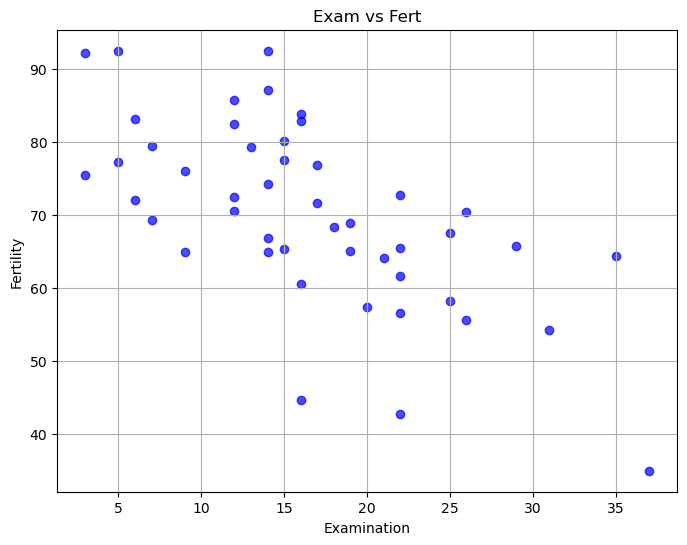

In [71]:
examination = swiss['Examination']
fertility = swiss['Fertility']

plt.figure(figsize= (8,6))
plt.scatter(examination, fertility, alpha=0.7, color ='b')
plt.title('Exam vs Fert')
plt.xlabel('Examination')
plt.ylabel('Fertility')
plt.grid(True)
plt.show()

In [ ]:
The higher the exam the lower the Fertility.